# Eigendecomposition

$$
\begin{aligned}
Av &= \lambda v \\
Av - \lambda v &= 0 \\
( A - \lambda I ) v &= 0 \\
Bv &= 0
\end{aligned}
$$
has nontrivial null space. That means:
$$ |A - \lambda I| = 0 $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
#matrix
A = [[1, 5], [2, 4]]

#extract the eigenvalues
eigvals = np.linalg.eig(A)

#note that the eigenvalues are in the first element of eignvals:
print(f"Eigenvalues: \n {eigvals}")

Eigenvalues: 
 EigResult(eigenvalues=array([-1.,  6.]), eigenvectors=array([[-0.92847669, -0.70710678],
       [ 0.37139068, -0.70710678]]))


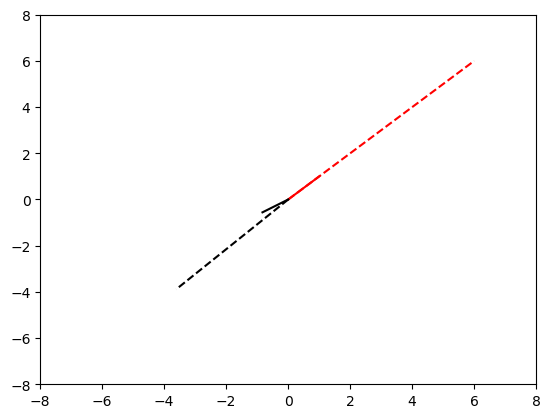

In [10]:
#specify two vectors
v1 = np.array([1, 1]) #is an eigenvector!
v2 = np.random.randn(2)  # agora shape (2,) #unlikely to be an eigenvector
v2 = v2/np.linalg.norm(v2) #unit length for convenience

#compute Av
Av1 = A@v1
Av2 = A@v2

#plot the vectors and Av
plt.plot([0, v1[0]], [0, v1[1]], 'r')
plt.plot([0, Av1[0]], [0, Av1[1]], 'r--')
plt.plot([0, v2[0]], [0, v2[1]], 'k')
plt.plot([0, Av2[0]], [0, Av2[1]], 'k--')

plt.axis([-8, 8, -8, 8])
plt.show()

In [11]:
#confirm eigenvalues for a 3x3 matrix
# specify matrix
A = [[-2, 2, -3],
    [-4, 1, -6],
    [-1, -2, 0]]

#get eigenvalues
evals = np.linalg.eig(A)
print(f"Evals: \n {evals}")

Evals: 
 EigResult(eigenvalues=array([-3., -1.,  3.]), eigenvectors=array([[-1.82827776e-16,  5.77350269e-01, -5.77350269e-01],
       [ 8.32050294e-01, -5.77350269e-01, -5.77350269e-01],
       [ 5.54700196e-01, -5.77350269e-01,  5.77350269e-01]]))


## Shortcut

$$
A = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$$

$$ \lambda^2 - (a+d)\lambda + (ad-bc) = 0 $$

a+d = trace  
ad-bc = determinant


### challenge

In [15]:
#generate diagonal matrix (2x2), compute its eigenvalues
A = np.diag([2, 1])
print(f"Matrix A: \n {A}"), print(' ')
print(f"Eigenvalues of A: \n {np.linalg.eig(A)[0]}"), print(' ')

#expand this to NxN diagonal matrices
A = np.diag(np.arange(3, 18))
print(f"Matrix A: \n {A}"), print(' ')
print(f"Eigenvalues of A: \n {np.linalg.eig(A)[0]}"), print(' ')

#triangular matrices (lower, upper)


Matrix A: 
 [[2 0]
 [0 1]]
 
Eigenvalues of A: 
 [2. 1.]
 
Matrix A: 
 [[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]]
 
Eigenvalues of A: 
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]
 


(None, None)

In [16]:
#repeat with triangular (lower/ upper)
A = np.triu(np.random.randn(4,4)) #upper / 'tril' - lower

print(f"Matrix A: \n {A}"), print(' ')
print(f"Eigenvalues of A: \n {np.linalg.eig(A)[0]}"), print(' ')

Matrix A: 
 [[ 1.80885563  0.19686664  0.53102747 -0.16899577]
 [ 0.          0.22838801 -0.39863543 -1.58116   ]
 [ 0.          0.          0.4208438   0.92141923]
 [ 0.          0.          0.         -0.59668826]]
 
Eigenvalues of A: 
 [ 1.80885563  0.22838801  0.4208438  -0.59668826]
 


(None, None)

### challenge 2

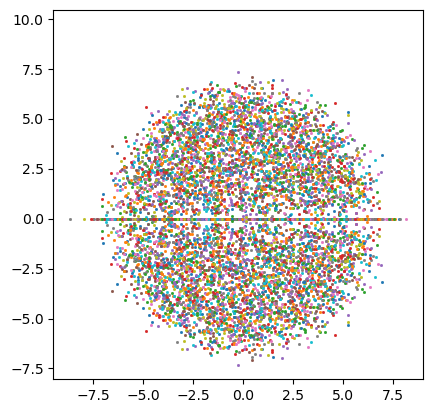

In [18]:
#generate 'large' random matrices, extrat eigenvalues, plot

#repeat this lots of times for a lots of random matrices, put all the eigenvalues in the same plot 

for i in range(200):
    A = np.random.randn(40,40)
    evals = np.linalg.eig(A)[0]
    plt.plot(np.real(evals), np.imag(evals), 's', markersize = 1)


plt. axis('square')
plt.show()

## Finding Eigenvectors

In [20]:
#matrix
A = [[1, 2], [2, 1]]

#extract the eigenvalues
eigvals, evecs = np.linalg.eig(A)

print(f"Eigenvalues of A: \n {eigvals}"), print(' ')
print(f"Eigenvectos of A: \n {evecs}")

Eigenvalues of A: 
 [ 3. -1.]
 
Eigenvectos of A: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


0.9999999999999999 0.9999999999999999


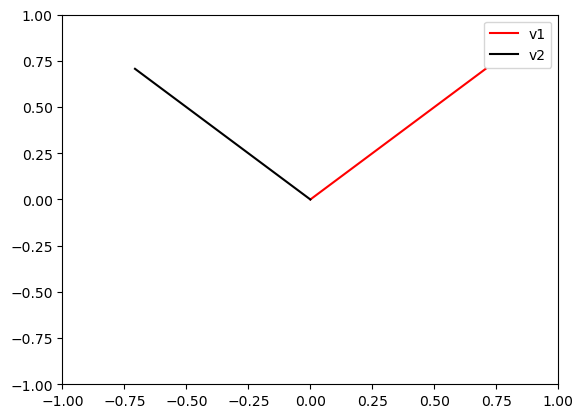

In [21]:
#compute the norm of each eigenvector
mag_v1 = np.sqrt(np.sum(np.square(evecs[:, 0])))
mag_v2 = np.sqrt(np.sum(np.square(evecs[:, 1])))
print(mag_v1, mag_v2)

#plot 
plt.plot([0, evecs[0,0]], [0, evecs[1,0]], 'r', label='v1')
plt.plot([0, evecs[0,1]], [0, evecs[1,1]], 'k', label='v2')

plt.axis([-1, 1, -1 , 1])
plt.legend()
plt.show()

In [22]:
A = [[3, 1], [4, 6]]
eigvals, eigvecs = np.linalg.eig(A)
print(eigvals), print(' ') 
print(eigvecs)

[2. 7.]
 
[[-0.70710678 -0.24253563]
 [ 0.70710678 -0.9701425 ]]


## Diagonalization

# $$\begin{aligned} 
AV = V\lambda \\
A = V\lambda V^{-1} \\
\end{aligned}
$$

Matrix A: 
 [[  41.  -74.    3.  -35.]
 [ -74.  454.  -11. -166.]
 [   3.  -11.   94.   69.]
 [ -35. -166.   69.  250.]]
 
Eigenvalues of A: 
 [555.33572181 208.75614337   1.0776028   73.83053202]
 
Eigenvectos of A: 
 [[-0.09244236  0.33361338 -0.84512039  0.40734268]
 [ 0.86650879 -0.42064557 -0.26829153 -0.01547478]
 [-0.09328905 -0.39817628  0.27276044  0.87083554]
 [-0.48157458 -0.74378429 -0.37335362 -0.27473247]]


<>:27: SyntaxWarning: invalid escape sequence '\L'
<>:27: SyntaxWarning: invalid escape sequence '\L'
C:\Users\kenny\AppData\Local\Temp\ipykernel_4864\1818841669.py:27: SyntaxWarning: invalid escape sequence '\L'
  plt.title('$V\Lambda V^{-1}$')


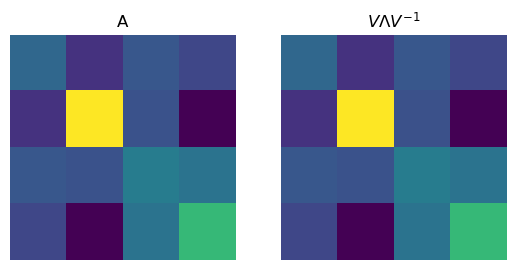

Reconstruction RMS:  1.102272001922122e-13


In [25]:
#eigendecomposition of A

#make a symetric matrix
A = np.round(10*np.random.randn(4,4))
A = A.T@A

print(f"Matrix A: \n {A}"), print(' ')

#eigendecomposition
evals, evecs = np.linalg.eig(A)

print(f"Eigenvalues of A: \n {evals}"), print(' ')
print(f"Eigenvectos of A: \n {evecs}")

#test reconstruction
Ap = evecs @ np.diag(evals) @ np.linalg.inv(evecs) #diagonal and inverse

#plot
plt.subplot(121)
plt.imshow(A)
plt.axis('off')
plt.title('A')

plt.subplot(122)
plt.imshow(Ap)
plt.axis('off')
plt.title('$V\Lambda V^{-1}$')

plt.show()

#subtract the two (should be zero with rounding errors)
recondiff = A - Ap

#reconstruction error ( note the numerical inaccuracies)
rmsA = np.sqrt(np.mean(np.square(np.reshape(recondiff, (1, -1)))))

print('Reconstruction RMS: ', rmsA)

<>:30: SyntaxWarning: invalid escape sequence '\L'
<>:30: SyntaxWarning: invalid escape sequence '\L'
C:\Users\kenny\AppData\Local\Temp\ipykernel_4864\2187618036.py:30: SyntaxWarning: invalid escape sequence '\L'
  plt.title('$\Lambda$')


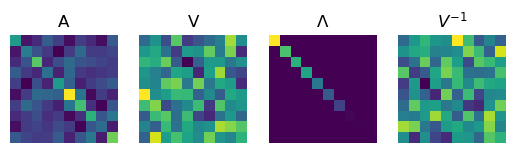

In [26]:
#diagonalization in images

# A matrix
A = np.random.randn(10,10)
A = A.T@A

#print(f"Matrix A: \n {A}"), print(' ')

#eigendecomposition
D, V = np.linalg.eig(A)

#print(f"Eigenvalues of A: \n {evals}"), print(' ')
#print(f"Eigenvectos of A: \n {evecs}")


#plot
plt.subplot(141)
plt.imshow(A)
plt.axis('off')
plt.title('A')

plt.subplot(142)
plt.imshow(V)
plt.axis('off')
plt.title('V')

plt.subplot(143)
plt.imshow(np.diag(D))
plt.axis('off')
plt.title('$\Lambda$')

plt.subplot(144)
plt.imshow(np.linalg.inv(V))
plt.axis('off')
plt.title('$V^{-1}$')

plt.show()


## Matrix Powers 

[[-0.90605204 -0.34430416 -0.24601696]
 [-0.24721392  0.90251847 -0.35262684]
 [-0.34344574  0.25867946  0.90284548]]
 
[[-0.90605204 -0.34430416 -0.24601696]
 [-0.24721392  0.90251847 -0.35262684]
 [-0.34344574  0.25867946  0.90284548]]


TypeError: imshow() missing 1 required positional argument: 'X'

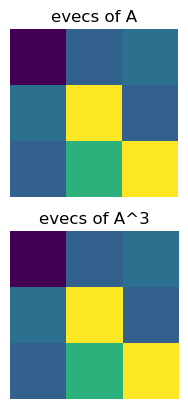

In [28]:
# eigenvalues of A and A^3

#create a symmetric matrix
A = np.random.rand(3,3)
A = A@A.T

D, V = np.linalg.eig(A)
D3, V3 = np.linalg.eig(A@A@A)

print(V), print(' ')
print(V3)

plt.subplot(221)
plt.imshow(V)
plt.axis('off')
plt.title('evecs of A')

plt.subplot(223)
plt.imshow(V3)
plt.axis('off')
plt.title('evecs of A^3')

plt.imshow()

#show the same matrices but with different signs

In [ ]:
# plot the eigenvectors and eigenvalues
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # For a single 3D subplot

#plot eigenvectors of A
ax.plot([0, V[0,0]], [0, V[1,0]],[0, V[2,0]], 'r')
ax.plot([0, V[0,1]], [0, V[1,1]],[0, V[2,1]], 'k')
ax.plot([0, V[0,2]], [0, V[1,2]],[0, V[2,2]], 'b')

#plot eigenvectors of A^3
ax.plot([0, V3[0,0]], [0, V3[1,0]],[0, V3[2,0]], 'r--')
ax.plot([0, V3[0,1]], [0, V3[1,1]],[0, V3[2,1]], 'k--')
ax.plot([0, V3[0,2]], [0, V3[1,2]],[0, V3[2,2]], 'b--')

plt.show()

plt.plot([1, 2, 3], D, 'bs-', label = 'A')
plt.plot([1.1, 2.1, 3.1], D3, 'rs-', label = 'A^3')
plt.title('Eigenvalues')
plt.legend()
plt.show()

In [ ]:
#proof

print(D)
print(D**3)

### Challenge

In [ ]:
A = np.random.randn(5,5)
A = A@A.T

B = np.random.randn(5,5)
B = B@B.T

D1, V1 = np.linalg.eig(A - B)
D2, V2 = np.linalg.eig(A@A - A@B - B@A + B@B)

print(np.round(D1, 3))
print(np.round(D2, 3))
print(np.round(D1**2, 3)) #the values are the same, but the orders can be different

In [ ]:
#sort eigenvalues
sidx1 = np.argsort(abs(D1))
sidx2 = np.argsort(D2)
print(sidx1)

In [ ]:
#now for the actual sorting
D1 = D1[sidx1]
D2 = D2[sidx2]

print(D1), print(' ')
print(D2), print(' ')
print(D1**2), print(' ')

# V1 = V1[:, sidx1]
# V2 = V2[:, sidx2]

In [ ]:
print(np.round(V1-V2, 3))

In [ ]:
print(np.round(V1,2)), print(' ')
print(np.round(V2,2))

### Distinct eigenvalues leads to distinct eigenvectors

### Implications of orthogonal eigenvectors

$$\begin{aligned}
V^TV = I \\
V^T = V^{-1}
\end{aligned}
$$

In [38]:
#create a random matrix
A = np.random.randn(14,14)

#make it symmetric (additive method)
A = A+A.T

#diagonalize it
evals, evecs = np.linalg.eig(A)

#Magnitudes of each vector
print(np.sqrt(sum(evecs**2)))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


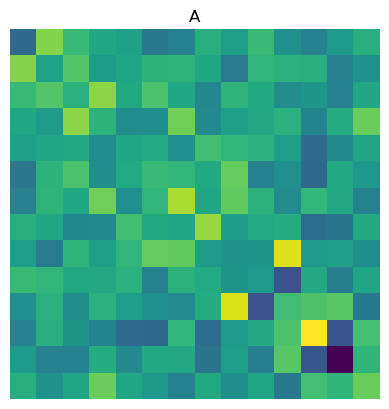

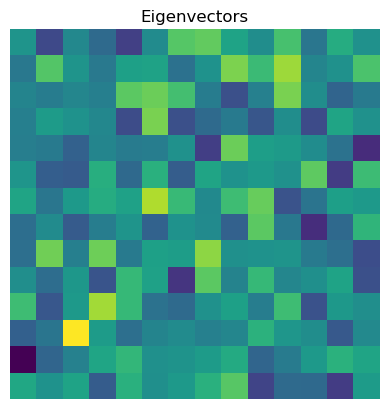

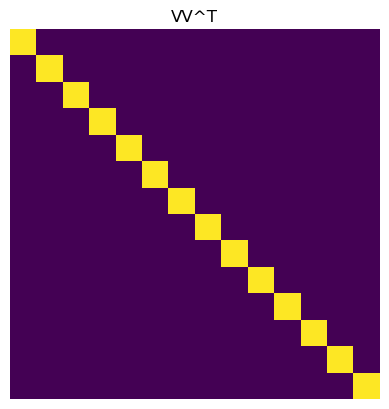

In [42]:
#make plots
plt.imshow(A)
plt.axis('off')
plt.title('A')
plt.show()

plt.imshow(evecs)
plt.axis('off')
plt.title('Eigenvectors')
plt.show()

plt.imshow(evecs@evecs.T)
plt.axis('off')
plt.title('VV^T')
plt.show()


### Challenge

In [57]:
#create mxm symetric matrix, take its eigendecomposition
m = 5
A = np.random.randn(m,m)
A = np.round(10*A.T@A)

print(f"Matrix A: \n {A}"), print(' ')

D, V = np.linalg.eig(A)
print(f"Eigenvalues of A: \n {D} \n \n Eigenvectos of A: \n {V}"), print(' ')

#convert to column vector:
v = V[:,2] #third column
#print(v)

print(np.reshape(v,(m,1)))


Matrix A: 
 [[ 72.  33.  16. -15.  13.]
 [ 33.  27.   4.   4.   6.]
 [ 16.   4.  24.   7.  21.]
 [-15.   4.   7.  64.  -3.]
 [ 13.   6.  21.  -3.  27.]]
 
Eigenvalues of A: 
 [100.96452106   1.17663573   9.46834578  37.06682946  65.32366798] 
 
 Eigenvectos of A: 
 [[-0.81553305 -0.29315405 -0.41045667  0.27295325 -0.07738473]
 [-0.38254598  0.42104879  0.72101372  0.33283617 -0.21385928]
 [-0.2338957   0.66161455 -0.33170259 -0.5658854  -0.27803973]
 [ 0.26566559 -0.19492113 -0.09911842  0.17376238 -0.92271866]
 [-0.2515532  -0.51093107  0.43796515 -0.6813934  -0.13985706]]
 
[[-0.41045667]
 [ 0.72101372]
 [-0.33170259]
 [-0.09911842]
 [ 0.43796515]]


In [63]:
# show that the norm of the outer product of v_i = 1
op = np.outer(v,v)
print(op), print(' ')
#or
v = np.reshape(V[:,2], (m,1))
print(v*v.T), print(' ') #with orientation, can use *

print(np.linalg.norm(op)) #must be 1

[[ 0.16847468 -0.29594489  0.13614954  0.04068382 -0.17976572]
 [-0.29594489  0.51986078 -0.23916212 -0.07146574  0.31577888]
 [ 0.13614954 -0.23916212  0.11002661  0.03287784 -0.14527417]
 [ 0.04068382 -0.07146574  0.03287784  0.00982446 -0.04341041]
 [-0.17976572  0.31577888 -0.14527417 -0.04341041  0.19181347]]
 
[[ 0.16847468 -0.29594489  0.13614954  0.04068382 -0.17976572]
 [-0.29594489  0.51986078 -0.23916212 -0.07146574  0.31577888]
 [ 0.13614954 -0.23916212  0.11002661  0.03287784 -0.14527417]
 [ 0.04068382 -0.07146574  0.03287784  0.00982446 -0.04341041]
 [-0.17976572  0.31577888 -0.14527417 -0.04341041  0.19181347]]
 
0.9999999999999997


In [65]:
#create one layer of A as lvv', compute its norm
print(np.linalg.norm(v*D[2]*v.T)), print(' ')
print(D[2])
#reconstruct A by summing over the eigenlayers (outer product)

9.468345777752464
 
9.468345777752468


In [67]:
#reconstruct A by summer over outer product

Arecon = np.zeros((m,m))

for i in range(m):
    v = np.reshape(V[:,i], (m,1))
    Arecon += v*D[i]*v.T
    print(np.linalg.matrix_rank(Arecon))

print(A), print(' ')
print(Arecon), print(' ')
print(A-Arecon), print(' ')

1
2
3
4
5
[[ 72.  33.  16. -15.  13.]
 [ 33.  27.   4.   4.   6.]
 [ 16.   4.  24.   7.  21.]
 [-15.   4.   7.  64.  -3.]
 [ 13.   6.  21.  -3.  27.]]
 
[[ 72.  33.  16. -15.  13.]
 [ 33.  27.   4.   4.   6.]
 [ 16.   4.  24.   7.  21.]
 [-15.   4.   7.  64.  -3.]
 [ 13.   6.  21.  -3.  27.]]
 
[[ 5.68434189e-14 -2.13162821e-14 -3.55271368e-15 -2.13162821e-14
  -1.06581410e-14]
 [-2.13162821e-14 -1.77635684e-14  5.77315973e-15 -5.32907052e-15
  -5.32907052e-15]
 [-3.55271368e-15  5.32907052e-15  1.42108547e-14  1.24344979e-14
  -2.13162821e-14]
 [-2.13162821e-14 -5.32907052e-15  1.24344979e-14  3.55271368e-14
   3.37507799e-14]
 [-1.06581410e-14 -5.32907052e-15 -2.13162821e-14  3.37507799e-14
   7.10542736e-15]]
 


(None, None)

### Challenge

In [14]:
A = np.random.randn(7,7)
print(f"Matrix A: \n {A}"), print(' ')
tr = np.matrix.trace(A)
print(f"Trace of A: \n {tr}"), print(' ')
dt = np.linalg.det(A)
print(f"Determinant of A: \n {dt}"), print(' ')
l = np.linalg.eig(A)[0]
print(f"Eigenvalues of A: \n {l}"), print(' ')

print(tr, sum(l)), print(' ')
print(dt, np.prod(l))

Matrix A: 
 [[ 0.9959421  -0.20847623  1.81863154  0.34062938 -0.57512763  1.08773724
   1.05868285]
 [ 0.62646723  2.31240132 -0.65264544  0.29204457  1.74719609  0.0236754
  -0.78383212]
 [-0.36362701  0.21262022 -2.91141115  0.45612343  0.10401224  0.90187495
  -0.4078701 ]
 [ 1.29153487 -0.16017274 -1.66774107 -0.66335497  1.72296524 -1.77472475
   0.29921611]
 [ 1.09589207  0.91561006 -1.15039197  1.79293749 -1.4934052   0.66866233
   0.14403368]
 [ 0.37322641 -0.66100816 -0.78562242  0.75725008 -0.56618294 -0.28948096
   0.26610512]
 [ 0.93966375 -0.81957    -0.53812935 -0.71587937  0.06755397 -0.60359253
  -0.43178264]]
 
Trace of A: 
 -2.4810915162272567
 
Determinant of A: 
 -49.66541815943601
 
Eigenvalues of A: 
 [ 2.36244702+0.66944153j  2.36244702-0.66944153j -2.76332764+0.j
 -0.73003367+0.97173437j -0.73003367-0.97173437j -1.03740817+0.j
 -1.94518242+0.j        ]
 
-2.4810915162272567 (-2.48109151622726+0j)
 
-49.66541815943601 (-49.66541815943621+0j)


In [16]:
A = np.random.randn(7,5) @ np.random.randn(5,7)
print(f"Matrix A: \n {A}"), print(' ')
tr = np.matrix.trace(A)
print(f"Trace of A: \n {tr}"), print(' ')
dt = np.linalg.det(A)
print(f"Determinant of A: \n {dt}"), print(' ')
l = np.linalg.eig(A)[0]
print(f"Eigenvector of A: \n {l}"), print(' ')

print(tr, sum(l)), print(' ')
print(dt, np.prod(l)) #product of the eigenvalues

Matrix A: 
 [[-0.60113335 -2.16367017  3.40398006  0.69086377  0.68705808  1.77543222
  -0.49676916]
 [-0.99657353 -0.2276539  -0.54494227  1.90759246 -0.18612886 -0.1791655
   0.04248484]
 [-0.94637866  2.30968346 -4.91885339  0.45524838  1.54314143  4.57577023
   1.1650532 ]
 [-1.06392356 -3.90768016  6.47811363  1.35914794 -2.02944054 -5.28259682
  -1.58311998]
 [-4.13307291  0.35526494  2.78878625 -2.22881921 -0.96559923 -2.69402413
   0.73103396]
 [ 0.53085534 -2.04160053  1.57579665  2.41590252 -1.97644174 -4.81347305
  -1.28696288]
 [ 2.00179248 -1.26036252 -0.38700217  0.44814162  2.38691017  6.59309962
  -0.49111728]]
 
Trace of A: 
 -10.658682272603542
 
Determinant of A: 
 -1.5140014046918952e-28
 
Eigenvector of A: 
 [-5.28602920e+00+0.00000000e+00j -2.77489791e+00+0.00000000e+00j
 -1.11472760e+00+1.80071166e+00j -1.11472760e+00-1.80071166e+00j
 -3.68299965e-01+0.00000000e+00j  5.73425865e-15+1.71592084e-15j
  5.73425865e-15-1.71592084e-15j]
 
-10.658682272603542 (-10.65868

## Generalizes eigendecomposition

$$ 
\begin{align*}
Sv &= \lambda v \\
Sv &= \lambda Iv \\
Sv &= \lambda Rv \\
R^{-1}Sv &= \lambda v \\
Cv &= \lambda v, \quad C = R^{-1}S
\end{align*}
$$

In [37]:
import scipy.linalg #kind of annoying, but numpy doesn't do GED

#define metrices
A = np.array([[3,2], [1,3]])
B = np.array([[1,1], [4,1]])

#GED
eigvals, eigvecs = scipy.linalg.eig(A,B) # S,R from the example above
print(f"Matrix A: \n {A}"), print(' ')
print(f"Matrix B: \n {B}"), print(' ')
print(f"Eigenvalues of A: \n {eigvals}"), print(' ')
print(f"Eigenvector of A: \n {eigvecs}"), print(' ')


Matrix A: 
 [[3 2]
 [1 3]]
 
Matrix B: 
 [[1 1]
 [4 1]]
 
Eigenvalues of A: 
 [-1.10727513+0.j  2.10727513+0.j]
 
Eigenvector of A: 
 [[-0.60332746 -0.11930764]
 [ 0.79749356 -0.99285733]]
 


(None, None)

In [39]:
#matrix-vector multiplication
Av = A@eigvecs[:, 1]
Bv = B@eigvecs[:, 1]

print(f" Av: \n {Av}"), print(' ')
print(f" Bv: \n {Bv}"), print(' ')


BinvAv = np.linalg.inv(B)@A@eigvecs[:,1]

print(f"BinAv: \n {BinvAv}"), print(' ')


 Av: 
 [-2.34363759 -3.09787964]
 
 Bv: 
 [-1.11216497 -1.47008789]
 
BinAv: 
 [-0.25141402 -2.09222357]
 


(None, None)

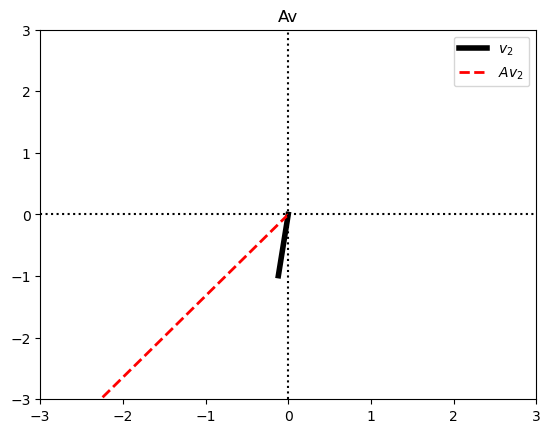

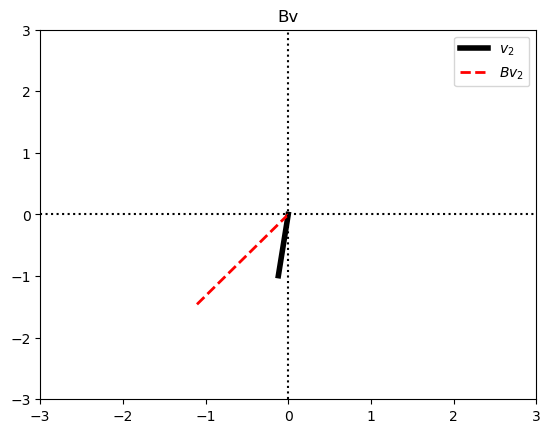

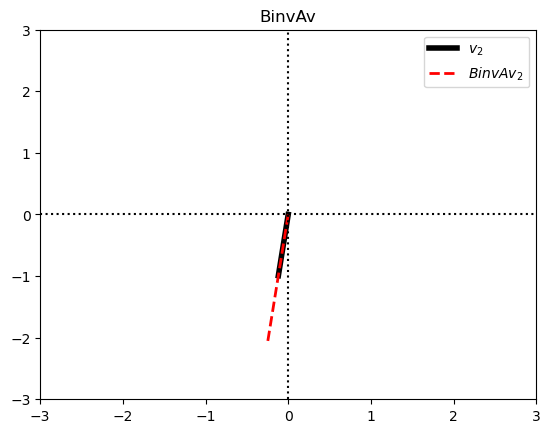

In [41]:
plt.plot([0,eigvecs[0,1]], [0, eigvecs[1,1]], 'k', linewidth=4, label = '$v_2$')
plt.plot([0,Av[0]], [0,Av[1]], 'r--', linewidth=2, label = '$Av_2$')
plt.xlim([-3,3])
plt.ylim([-3, 3])
plt.plot([-3,3], [0,0], 'k:')
plt.plot([0,0], [-3,3], 'k:')
plt.legend()
plt.title('Av')
plt.show()

plt.plot([0,eigvecs[0,1]], [0, eigvecs[1,1]], 'k', linewidth=4, label = '$v_2$')
plt.plot([0,Bv[0]], [0,Bv[1]], 'r--', linewidth=2, label = '$Bv_2$')
plt.xlim([-3,3])
plt.ylim([-3, 3])
plt.plot([-3,3], [0,0], 'k:')
plt.plot([0,0], [-3,3], 'k:')
plt.legend()
plt.title('Bv')
plt.show()

plt.plot([0,eigvecs[0,1]], [0, eigvecs[1,1]], 'k', linewidth=4, label = '$v_2$')
plt.plot([0,BinvAv[0]], [0,BinvAv[1]], 'r--', linewidth=2, label = '$BinvAv_2$')
plt.xlim([-3,3])
plt.ylim([-3, 3])
plt.plot([-3,3], [0,0], 'k:')
plt.plot([0,0], [-3,3], 'k:')
plt.legend()
plt.title('BinvAv')
plt.show()

## Challenge

Matrix S: 
 [[-1.24728753  1.44078461]
 [ 0.25002025  0.81746824]]
 
Matrix R: 
 [[ 0.59334689 -0.66238528]
 [-1.19189785 -0.15315598]]
 
[-0.71520124+0.j -2.19147317+0.j]
 
[-0.71520124+0.j -2.19147317+0.j]


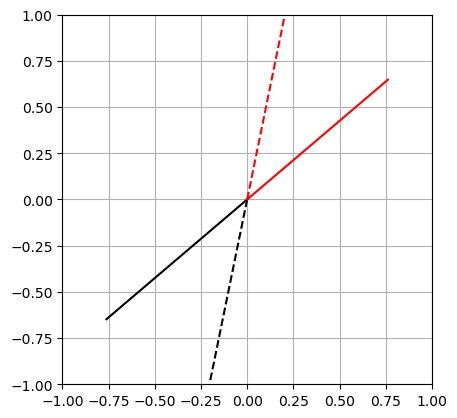

In [52]:
# the goal is to compare eigen(S,R) with eig(inv(R)*S))

# part 1 : GED on 2x2 matrices
S = np.random.randn(2,2)
R = np.random.randn(2,2)

print(f"Matrix S: \n {S}"), print(' ')
print(f"Matrix R: \n {R}"), print(' ')

#two ways to calculate
Ls, Ws = scipy.linalg.eig(S,R)
Li, Wi = scipy.linalg.eig(np.linalg.inv(R)@S)

print(Ls), print(' ')
print(Li)

#plot eigenvectors
plt.plot([0,Ws[0,0]], [0,Ws[1,0]], 'k')
plt.plot([0,Ws[0,1]], [0,Ws[1,1]], 'k--')
plt.plot([0,Wi[0,0]], [0,Wi[1,0]], 'r')
plt.plot([0,Wi[0,1]], [0,Wi[1,1]], 'r--')
plt.axis('square')
plt.grid()
plt.axis([-1, 1, -1, 1])
plt.show()

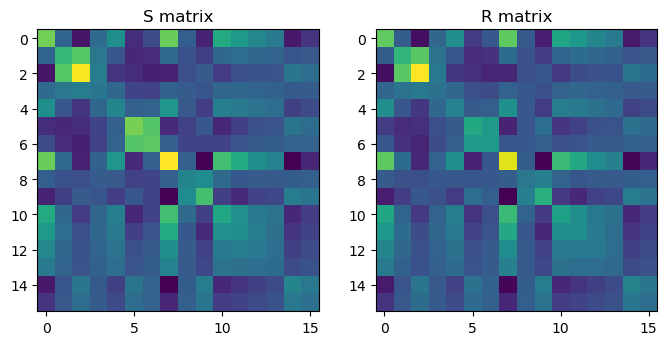

In [56]:
# Now using large matrices

from scipy.io import loadmat

data = loadmat('real_matrices.mat')
S = data['S']
R = data['R']

#Let's have a look
fig, ax = plt.subplots(1,2, figsize = (8,5))
ax[0].imshow(S)
ax[0].set_title('S matrix')

ax[1].imshow(R)
ax[1].set_title('R matrix')

plt.show()

In [58]:
print(np.shape(R))
print(np.linalg.matrix_rank(R))

(16, 16)
14


[0.73784775 0.87576635 0.88723854 0.91897858 0.97712091 1.00782673
 1.01728891 1.03107156 1.04896509 1.08786505 1.12754752 1.18606602
 1.21552158 1.52684853 1.70299903 2.43094372]
 
[-3907409.78577137 -1462362.85935721  -480847.35076439  -307533.8377198
  -268361.02576976   -57680.0953963    -51041.69522124    11955.05275055
    20431.21637914    40288.9977109     42872.88916603   103447.27488932
   207636.11244083   538638.81870122  1612161.36238357  3957823.58427288]


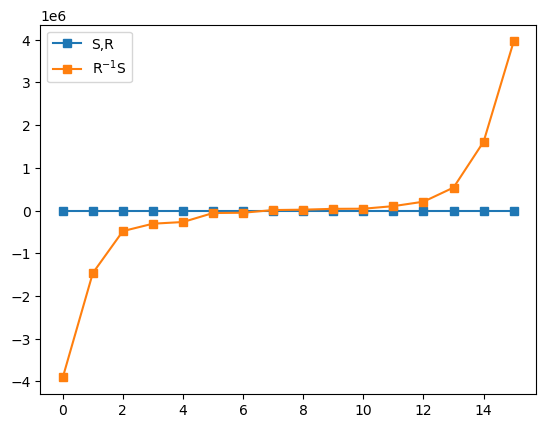

In [66]:
#two ways to calculate
Ls, Ws = scipy.linalg.eigh(S,R) #the 'h' in 'eigh' get smoother results
Li, Wi = scipy.linalg.eigh(np.linalg.inv(R)@S)

print(Ls), print(' ')
print(Li)

#plot eigenvectors
plt.plot(Ls, 's-', label = 'S,R')
plt.plot(Li, 's-', label = 'R$^{-1}$S')
plt.legend()
plt.show()